# 2403 PT_DS Regression Project

### Project Title: Regression Project
Analyse and predict average temperature from agri-food sector.
#### Done By: Regression Project Team (K Ebrahim, J Sithole, J Maleka, S Tlhale, N Mhlophe & M Majola)

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Regression Models</a>
<ul>
    <li><a href="#six-one">Multiple Linear Regression (MLR)</a></li>
    <li><a href="#six-two">Random Forest Regression</a></li>
    <li><a href="#six-three">Gradient Boosting Regression (XGBoost)</a></li>
</ul>


<a href=#nine>6. Conclusion and Future Work</a>

<a href=#ten>7. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>
* **Objective of the Project:** 

    The aim is to analyse and predict average temperature from the agri-food sector, using data from the FAO and IPCC, to understand climate impacts and develop sustainable strategies for stakeholders including policymakers and agricultural businesses.


* **Project Purpose:** 

     The purpose of this project is to analyze and predict average temperatures specifically in the agri-food sector. By leveraging data from the FAO (Food and Agriculture Organization) and the IPCC (Intergovernmental Panel on Climate Change), the project aims to gain deeper insights into how climate impacts influence the agricultural industry. The objective is to help develop sustainable strategies that can be used by policymakers and agricultural businesses to mitigate risks associated with climate change and enhance agricultural productivity and sustainability

* **Project Details:** 

     **Data Source**: The project utilizes data from internationally recognized organizations like FAO and IPCC, ensuring reliable and comprehensive climate and agricultural data.

     **Focus**: The project centers on understanding the relationship between average temperatures and various factors in the agri-food sector, potentially including crop yields, soil conditions, and climate variability.

     **Goal**: Develop predictive models that can forecast future average temperatures in agricultural regions, which will help stakeholders plan for climate resilience.
    
     **Impact**: This information will support sustainable agricultural practices, improve decision-making for businesses, and help policymakers in creating adaptation strategies for climate-related challenges.
---

### ***Dataset Features***:
**Area**: The data collection covers a vast portion of the globe (236 countries). The dataset includes data from a diverse range of countries across all continents, capturing different regions, climates, and agricultural practices.

**Year**: 1990 to 2020.

### Emission Sources:
- **Savanna fires**: CO2 emissions from fires in savanna regions.
- **Forest fires**: CO2 emissions from forest fires.
- **Crop Residues**: Emissions from the burning or decomposition of crop residues.
- **Rice Cultivation**: CO2 emissions related to rice farming, often associated with methane emissions as well.
- **Drained organic soils (CO2)**: Emissions from drained peatlands or other organic soils.

**CO2 is recorded in kilotonnes (kt): 1 kt represents 1000 kg of CO2**

- **Savanna fires**: Emissions from fires in savanna ecosystems.
- **Forest fires**: Emissions from fires in forested areas.
- **Crop Residues**: Emissions from burning or decomposing leftover plant material after crop harvesting.
- **Rice Cultivation**: Emissions from methane released during rice cultivation.
- **Drained organic soils (CO2)**: Emissions from carbon dioxide released when draining organic soils.
- **Pesticides Manufacturing**: Emissions from the production of pesticides.
- **Food Transport**: Emissions from transporting food products.
- **Forestland**: Land covered by forests.
- **Net Forest conversion**: Change in forest area due to deforestation and afforestation.
- **Food Household Consumption**: Emissions from food consumption at the household level.
- **Food Retail**: Emissions from the operation of retail establishments selling food.
- **On-farm Electricity Use**: Electricity consumption on farms.
- **Food Packaging**: Emissions from the production and disposal of food packaging materials.
- **Agrifood Systems Waste Disposal**: Emissions from waste disposal in the agrifood system.
- **Food Processing**: Emissions from processing food products.
- **Fertilizers Manufacturing**: Emissions from the production of fertilizers.
- **IPPU**: Emissions from industrial processes and product use.
- **Manure applied to Soils**: Emissions from applying animal manure to agricultural soils.
- **Manure left on Pasture**: Emissions from animal manure on pasture or grazing land.
- **Manure Management**: Emissions from managing and treating animal manure.
- **Fires in organic soils**: Emissions from fires in organic soils.
- **Fires in humid tropical forests**: Emissions from fires in humid tropical forests.
- **On-farm energy use**: Energy consumption on farms.
- **Rural population**: Number of people living in rural areas.
- **Urban population**: Number of people living in urban areas.
- **Total Population - Male**: Total number of male individuals in the population.
- **Total Population - Female**: Total number of female individuals in the population.
- **total_emission**: Total greenhouse gas emissions from various sources.
- **Average Temperature °C**: The average increasing of temperature (by year) in degrees Celsius.


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [4]:
# Importing all Important Packages
import pickle                                       #For saving and loading Python objects.
#import joblib                                       #For saving and loading large NumPy arrays and Python objects efficiently.
import seaborn                                      #For saving and loading large NumPy arrays and Python objects efficiently.
from sklearn import metrics                         #For calculating evaluation metrics like mean squared error, R-squared, etc.
import statsmodels.api as sm                        #For statistical modeling, including linear regression
from sklearn.pipeline import make_pipeline          #For creating pipelines that chain multiple data preprocessing and modeling steps.
from sklearn.tree import DecisionTreeRegressor      #For decision tree models.
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler    #For data preprocessing tasks like scaling and normalization.
from sklearn.model_selection import train_test_split #For tasks like splitting data into training and testing sets.
from sklearn.linear_model  import LinearRegression, Ridge, Lasso  #For linear regression models, including Ridge and Lasso regression.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd                                 # for data manipulation and analysis
import numpy as np                                  # for numerical operations
import matplotlib.pyplot as plt                     # for data visualization
import seaborn as sns                               # for enhanced data visualization 
import warnings                                     #For controlling warnings that might be generated during code execution.
warnings.filterwarnings('ignore')                   # for excluding warnings
from scipy.stats import ttest_ind

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

**Data provided by project repo.**

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [5]:
# Loading co2 emissions dataset using pandas

df = pd.read_csv('co2_emissions_from_agri.csv')
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [ ]:
# Find count of nulls
null_counts = df.isnull().sum()

# Determine % of nulls in columns
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage = null_percentage[null_percentage > 0]

# Add to dataframe
null_df = pd.DataFrame({
    'null_count': null_counts,
    'null_column_percentage': null_percentage
})

# Filter df for nulls only
null_df = null_df[null_df["null_count"]> 0]
print(null_df)
print("\nDataframe shape:", df.shape)

                                 null_count  null_column_percentage
Crop Residues                          1389               19.942570
Fires in humid tropical forests         155                2.225413
Food Household Consumption              473                6.791098
Forest fires                             93                1.335248
Forestland                              493                7.078248
IPPU                                    743               10.667624
Manure Management                       928               13.323762
Manure applied to Soils                 928               13.323762
Net Forest conversion                   493                7.078248
On-farm energy use                      956               13.725772
Savanna fires                            31                0.445083

Dataframe shape: (6965, 31)


In [ ]:
# Dropping nulls and confirming shape
df.dropna(inplace=True)
print("\nDataframe shape:", df.shape)


Dataframe shape: (4546, 31)


In [ ]:
# Find duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
# Find outliers using scipy.stats.
from scipy import stats

# Select numeric datatypes
numeric_cols = df.select_dtypes(include="number")

# calculate zscores
zscores = np.abs(stats.zscore(numeric_cols))

# Filter zscores > 3
outliers = numeric_cols[(zscores > 3).any(axis=1)]

# Filter df with indices of outliers
df.loc[outliers.index]

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
155,Angola,1990,25197.6220,15300.4301,32.3523,24.7274,346.4974,1.0,100.0467,0.0,...,228.6219,0.0,14989.1408,7.0463,7650444.0,4520997.0,5837431.0,5991207.0,69866.840429,0.676667
156,Angola,1991,25197.6220,15300.4301,39.7935,31.3600,346.4974,1.0,98.6277,0.0,...,230.9840,0.0,14989.1408,7.0463,7710281.0,4843165.0,6029631.0,6199060.0,69959.718829,0.328333
157,Angola,1992,25197.6220,15300.4301,43.6659,34.3000,346.4974,0.0,102.1643,0.0,...,233.7026,0.0,14989.1408,7.0463,7776001.0,5192344.0,6224203.0,6408303.0,70061.336629,0.393500
158,Angola,1993,25197.6220,15300.4301,43.9124,39.2000,346.4974,3.0,123.2375,0.0,...,228.8310,0.0,14989.1408,7.0463,7839762.0,5563972.0,6416502.0,6621767.0,70065.877945,0.341333
159,Angola,1994,25197.6220,15300.4301,49.1647,188.1600,346.4974,0.0,134.8715,0.0,...,223.8926,0.0,14989.1408,7.0463,7889542.0,5951759.0,6616409.0,6845622.0,70296.692429,0.221333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,Zambia,2016,15155.6428,26865.5563,172.0801,43.2905,14465.5896,63.0,241.4879,0.0,...,315.7753,0.0,24028.8473,119.5355,9550308.0,7041082.0,8260471.0,8507289.0,106393.870152,1.300083
6930,Zambia,2017,13577.1825,26854.3922,218.4410,57.9670,14457.3172,74.0,238.5063,0.0,...,319.1341,0.0,24939.2933,91.1681,9747709.0,7346421.0,8525934.0,8772120.0,106048.711047,0.103500
6931,Zambia,2018,13846.0542,24609.2979,155.4773,59.3821,14464.0570,75.0,208.4653,0.0,...,319.3220,0.0,21785.1154,98.1564,9945501.0,7663677.0,8794716.0,9041177.0,101153.495547,0.699500
6932,Zambia,2019,14693.4332,23933.2234,134.7087,48.1690,14554.7252,75.0,237.7122,0.0,...,316.8205,0.0,22298.4567,114.3543,10143883.0,7993486.0,9066397.0,9314079.0,101804.316347,0.964583


- Decide on action to deal with outliers, to be removed or make use of Robust Regression that is less sensitive to outliers.
- The dataset can be split to handle both scenarios, without outliers to proceed with LinearRegression and with outliers using HuberRegressor from sklearn. 
---

In [ ]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 31 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             4546 non-null   object 
 1   Year                             4546 non-null   int64  
 2   Savanna fires                    4546 non-null   float64
 3   Forest fires                     4546 non-null   float64
 4   Crop Residues                    4546 non-null   float64
 5   Rice Cultivation                 4546 non-null   float64
 6   Drained organic soils (CO2)      4546 non-null   float64
 7   Pesticides Manufacturing         4546 non-null   float64
 8   Food Transport                   4546 non-null   float64
 9   Forestland                       4546 non-null   float64
 10  Net Forest conversion            4546 non-null   float64
 11  Food Household Consumption       4546 non-null   float64
 12  Food Retail             

- The only object type is Area which are country names, this feature can be one-hot encoded before fitting models.

In [ ]:
# Clean column names
def clean_column_names(columns):
    # Initialize empty list
    cleaned_cols = []
    for col in columns:
        # Apply lower function and replace spaces and characters
        col = col.lower().replace(" ", "_").replace("(", "").replace(")", "").replace("-", "").replace("°", "").replace("__", "_")
        # Append each cleaned column to list
        cleaned_cols.append(col)
    return cleaned_cols

# Apply function to df
df.columns = clean_column_names(df.columns)
df.head()

,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_co2,pesticides_manufacturing,food_transport,forestland,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,onfarm_energy_use,rural_population,urban_population,total_population_male,total_population_female,total_emission,average_temperature_c
31,Albania,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,...,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750
32,Albania,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,...,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500
33,Albania,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,...,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250
34,Albania,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,...,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500
35,Albania,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,...,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
# Exploring dataset
transposed_description = df.describe().T
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(transposed_description.to_string())

                                  count        mean          std        min        25%        50%         75%          max
year                            4546.00     2005.30         8.86    1990.00    1998.00    2005.00     2013.00      2020.00
savanna_fires                   4546.00     1578.32      6188.11       0.00       0.33      11.35      329.38    114616.40
forest_fires                    4546.00     1154.42      3788.98       0.00       0.05       7.59      222.43     52227.63
crop_residues                   4546.00     1202.17      4069.99       0.00      23.36     132.52      513.16     33490.07
rice_cultivation                4546.00     5601.93     21612.52       0.00      90.36     268.51     1344.48    164915.26
drained_organic_soils_co2       4546.00     5274.47     19388.81       0.00       0.00     149.76     2864.21    241025.07
pesticides_manufacturing        4546.00      490.49      1747.78       0.00       8.00      34.00      189.75     16459.00
food_transport  

- Some values are negative such as `forestland` and `total_emission`, this could be due to deforestation and net negative emissions.
- The min and max values for `year` indicates a starting date of 1990 up until 2020, a standard deviation of 8.86 and a mean of 2005, which can indicate a centering point of the data.
- There appears to be high variability for most features and high ranges that implies outliers. The same high variability applies in scale, such as with `year` versus population count.
---

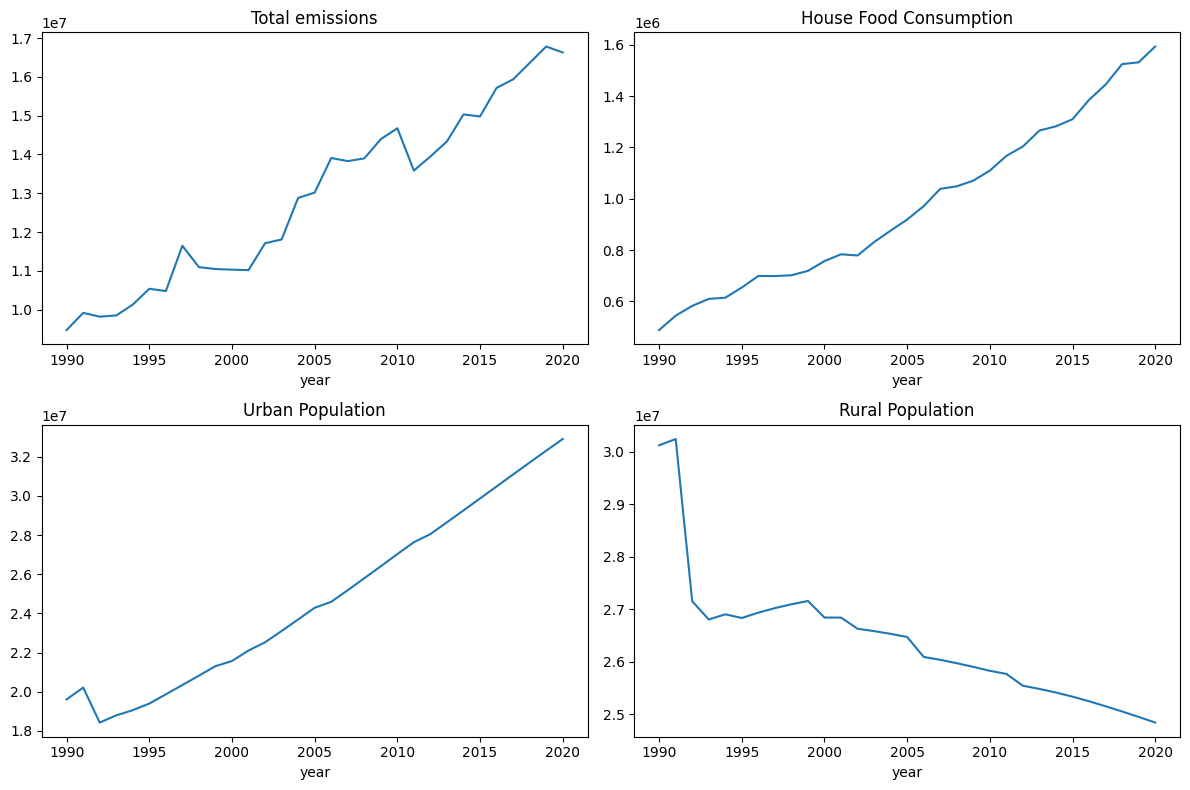

In [ ]:
# Grouping by year with emissions, population size, food_household_consumption
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Group by year with emissions, household food consumption and population
df.groupby('year')['total_emission'].sum().plot(title="Total emissions",ax=ax[0, 0])
df.groupby('year')['food_household_consumption'].sum().plot(title="House Food Consumption", ax=ax[0, 1])
df.groupby('year')['urban_population'].mean().plot(title="Urban Population", ax=ax[1, 0])
df.groupby('year')['rural_population'].mean().plot(title= "Rural Population", ax=ax[1, 1])

# Show plots
plt.tight_layout()
plt.show()

**-Emissions Growth Drivers:** The increase in emissions is likely driven by the rise in urban population and food consumption. As more people move to urban areas and food demand increases, emissions are expected to rise. 

**-Population Shift Impact:** The population shift from rural to urban areas is a key trend. Urbanization generally leads to lifestyle changes that may increase individual carbon footprints, thus potentially impacting total emissions. 

**-Potential for Policy Focus:** If emissions are tied to urbanisation and food consumption, policies promoting sustainable urban planning and responsible consumption practices could help mitigate emission growth.

---

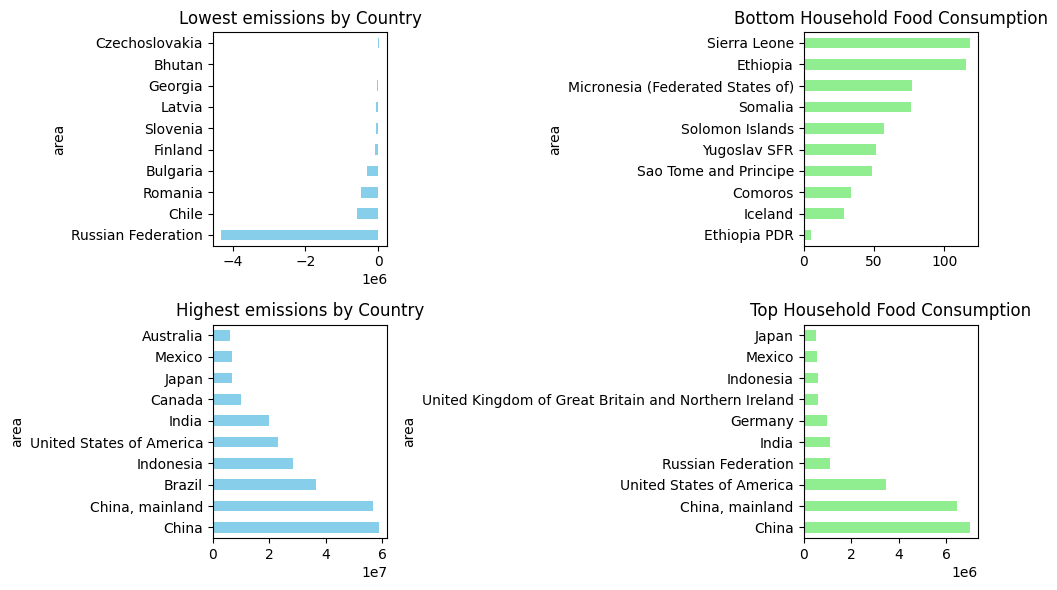

In [ ]:
# Grouping by country with emissions and household consumption
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# Group by area with emissions and household food consumption
df.groupby('area')['total_emission'].sum().sort_values().head(10).plot(title='Lowest emissions by Country', ax=ax[0, 0], kind='barh', color='skyblue')
df.groupby('area')['food_household_consumption'].sum().sort_values().head(10).plot(title='Bottom Household Food Consumption', ax=ax[0, 1], kind='barh', color='lightgreen')
df.groupby('area')['total_emission'].sum().sort_values(ascending=False).head(10).plot(title='Highest emissions by Country', ax=ax[1, 0], kind='barh', color='skyblue')
df.groupby('area')['food_household_consumption'].sum().sort_values(ascending=False).head(10).plot(title='Top Household Food Consumption', ax=ax[1, 1], kind='barh', color='lightgreen')

# Show plots
plt.tight_layout()
plt.show()

- Research is required to determine the high negative emissions by Russia and for which period.
- The lowest emissions by food consumption is basically randomized by region, further research can be conducted to understand these findings.
- China seems to be split by it's mainland, followed by Brazil as the second biggest emitter. These countries could have high export industries that explain the high emissions.
---

**Plots Overview**

Top-Left Plot: Lowest Emissions by Country

This bar plot displays the countries with the lowest total emissions.
Notably, countries like Czechoslovakia, Bhutan, Georgia, and Latvia have significantly negative emissions, which may indicate efforts in carbon capture or reporting errors.
The values are skewed towards negative emissions, with the Russian Federation being the largest in this group, contributing to negative emissions.

Top-Right Plot: Bottom Household Food Consumption

This plot shows the countries with the lowest household food consumption.
Sierra Leone, Ethiopia, and Somalia have the lowest household food consumption, indicating limited food availability or lower consumption patterns in these regions.
Other countries like Iceland, Yugoslavia (SFR), and Comoros also show low household food consumption, which could reflect economic conditions or smaller populations.

Bottom-Left Plot: Highest Emissions by Country

This bar plot highlights the countries with the highest total emissions.
China stands out with the highest emissions, followed by the United States, Brazil, and India.
Developed and industrialized nations like Australia, Japan, Mexico, and Canada also feature prominently in the top emitters, reflecting their industrial activities and large populations.
Bottom-Right Plot: Top Household Food Consumption

This plot shows the countries with the highest household food consumption.
China again dominates, indicating its massive population and increasing food consumption as its economy grows.
Other countries like the United States, India, and the Russian Federation are also notable for high food consumption, reflecting both their large populations and economic status.
European countries like Germany and the UK have high food consumption, likely tied to their large economies and affluent populations.

**Insights**

Emission Patterns:

The highest emitters, such as China, the US, and India, are also among the most populous and industrialized nations, indicating that economic development is strongly tied to emissions.
The presence of some countries with negative emissions, such as Czechoslovakia and Bhutan, might reflect aggressive carbon capture efforts, reforestation, or different reporting practices.

Household Food Consumption:

The countries with the highest food consumption, China and the US, correspond to countries with large populations and high standards of living.
On the flip side, Sierra Leone, Ethiopia, and Somalia, known for facing food insecurity, show the lowest household food consumption, emphasizing disparities in food availability and nutrition.

Comparing Emissions and Food Consumption:

China leads in both emissions and food consumption, reflecting its role as both a major economic power and a country with rising living standards and consumption patterns.
India shows similar trends, being in both high emissions and high food consumption categories, reflecting the development and population size.
Interestingly, while Russia appears in the lowest emissions category, it also appears in the top household food consumption category, which might suggest successful efforts to offset emissions through environmental policies.

**Possible Analysis**

Correlation Analysis: You could explore the relationship between a country's emissions and its food consumption to identify patterns or anomalies. Large economies may have both high emissions and food consumption, but the degree of their correlation could be telling for policy decisions.

Per Capita Consumption: Instead of focusing on total emissions or consumption, looking at per capita metrics might provide more insights into efficiency and resource use. For instance, while China and India have large absolute numbers, per capita values could reveal how individuals or households contribute.

Environmental Policies: Some countries like Bhutan have negative emissions, indicating a strong focus on environmental sustainability. This could be an interesting point of comparison for policy studies, especially in contrast to high-emission countries.

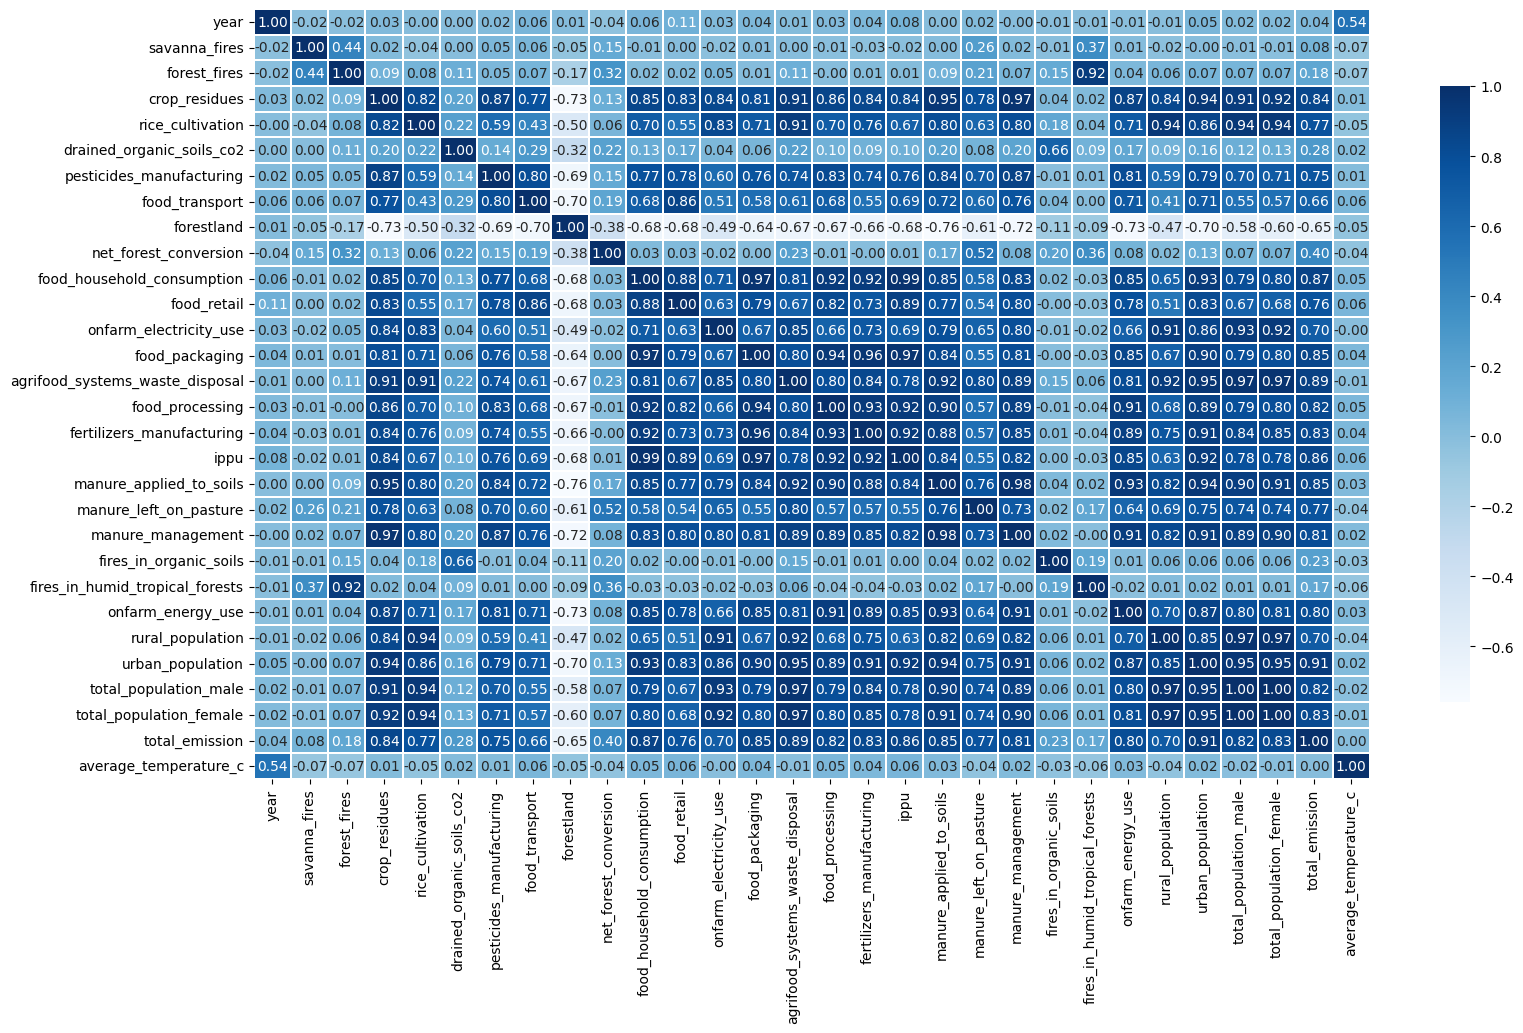

In [ ]:
# Looking at correlation, dropping non-numerical col
numerical_cols = df.drop(columns='area', axis=1).corr()

# Plotting heatmap with annotations
fig = plt.figure(figsize=(18, 10))
sns.heatmap(numerical_cols, cmap='Blues', linewidths=0.3, linecolor='white', annot=True, fmt=".2f",cbar_kws={"shrink": .8})
plt.show()

-The main drivers of emissions in this dataset are agricultural activities (crop residues, manure, fertilizers), urbanization, and the food processing and distribution chain. 

-Forest conservation appears to counteract emissions, suggesting a potential mitigation strategy.

-Population growth and urbanization trends are closely linked with rising emissions, indicating a need for sustainable practices in urban planning and food systems.

-There may be a feedback loop between emissions and temperature, hinting at the broader implications for climate change. 

---

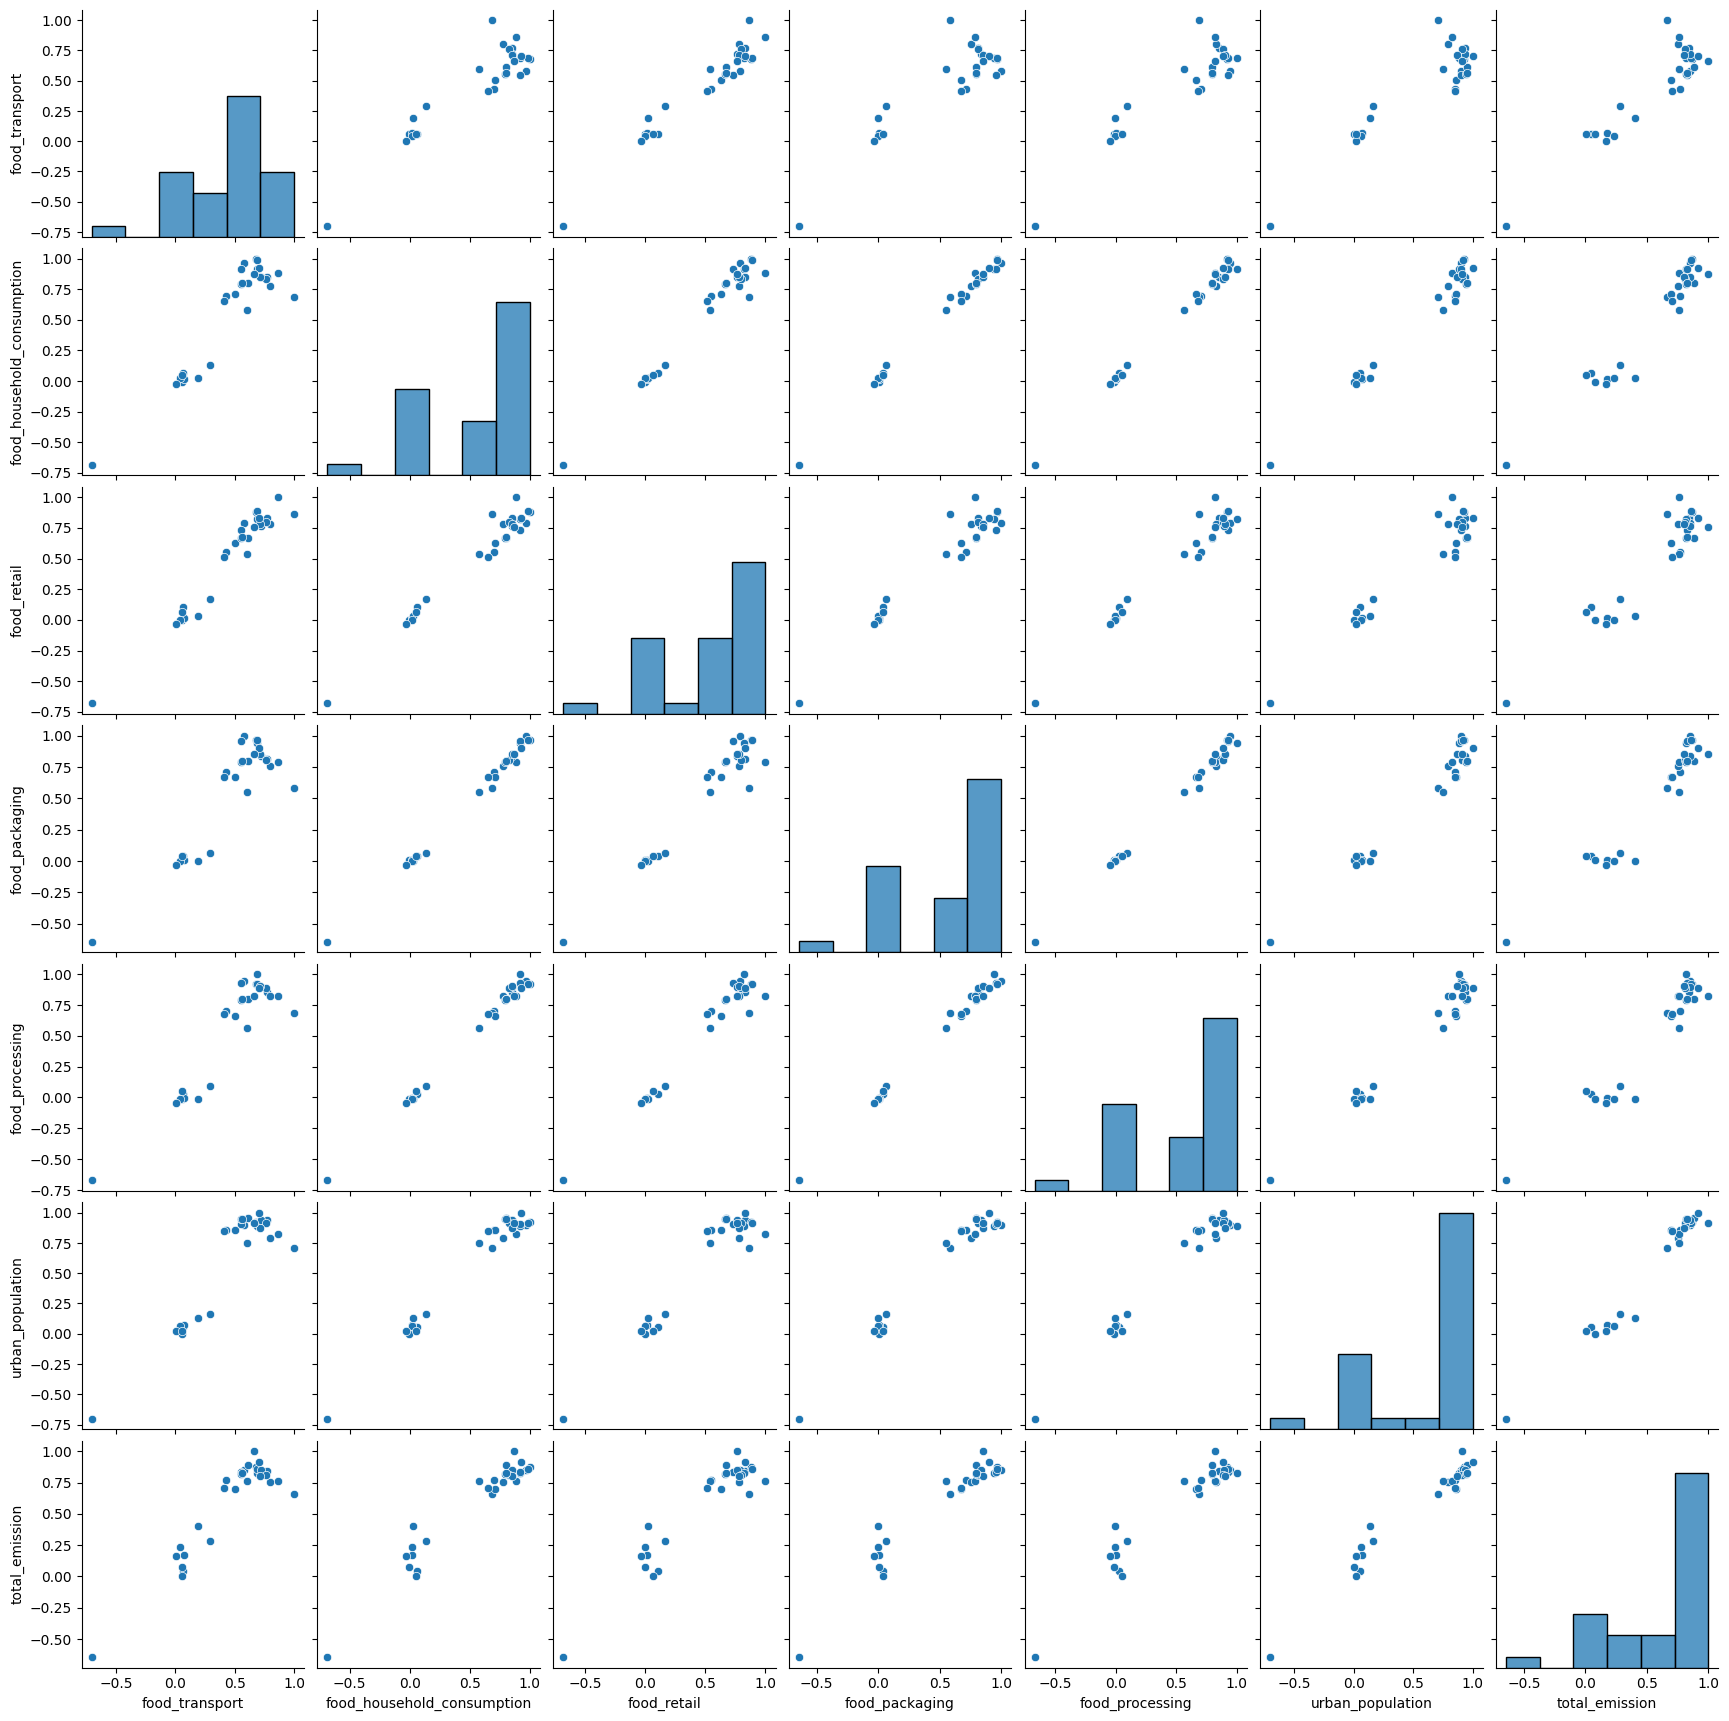

In [ ]:
# Creating a pairplot

sns.pairplot(numerical_cols[['food_transport', 'food_household_consumption', 'food_retail', 'food_packaging', 'food_processing', 'urban_population', 'total_emission']])
plt.show()

**-Urbanisation and Food Industry Impact:** The interconnectedness of urban population growth with food consumption, processing, and packaging suggests that the urban food supply chain is a significant contributor to emissions.

**-Emission Mitigation Opportunities:** Targeting emissions reductions in food transport, packaging, and processing might help reduce total emissions, especially as these variables are linked to household consumption and retail.

**-Focus on Urban Sustainability:** Sustainable food policies in urban areas could have a substantial impact, as urbanisation continues to grow and directly influences other high-emission sectors. 

---

**Violin plot**

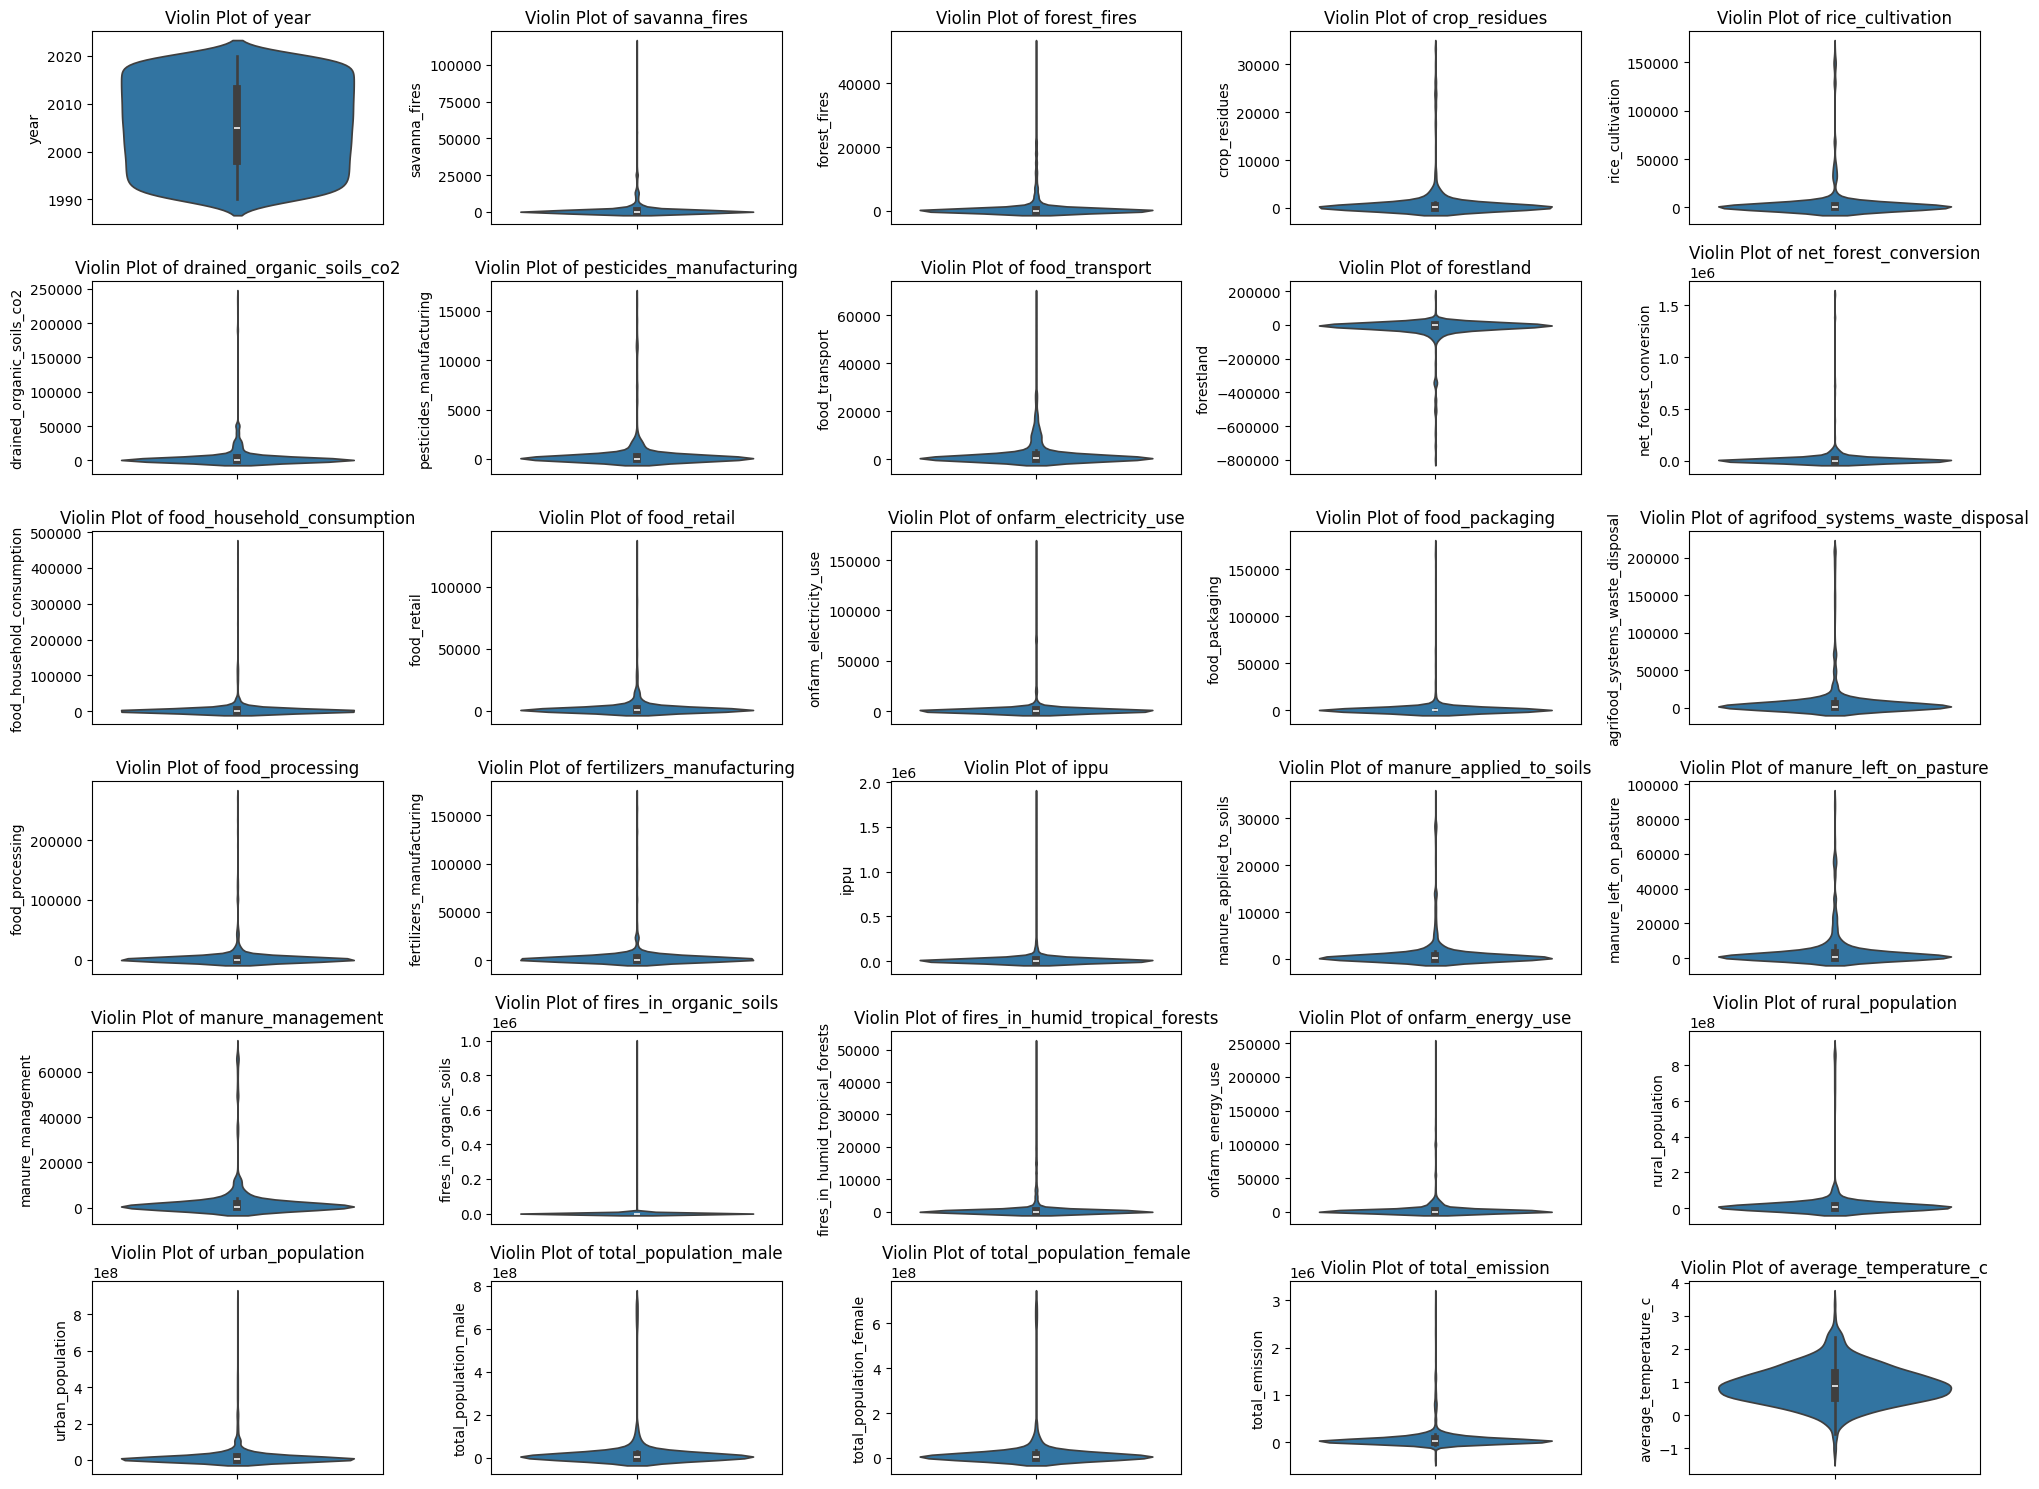

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# This line selects all columns in the DataFrame 'df' that are of type 'float64' or 'int64' (i.e., numeric columns) and stores their names in 'numeric_columns'.

# Create figure
plt.figure(figsize=(20, 15))
# This line creates a new figure with a specified size of 20 inches by 15 inches, which will contain all the subplots.

# Loop through numeric columns and create violin plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 5, i)  # Create subplot
    # This line creates a subplot grid with 6 rows and 5 columns, and places the current plot in the 'i'-th position.
    
    sns.violinplot(data=df, y=column)  # Create violin plot
    # This line creates a violin plot for the current column using the Seaborn library. The 'data' parameter specifies the DataFrame, and the 'y' parameter specifies the column to plot.
    
    plt.title(f'Violin Plot of {column}')  # Set title
    # This line sets the title of the current subplot to "Violin Plot of {column}", where '{column}' is the name of the current column.
    
    plt.tight_layout()  # Adjust layout
    # This line adjusts the subplot parameters to give some padding and prevent overlap between subplots.

# Show plots
plt.show()
# This line displays the figure with all the subplots.


**Results**


1. Year: 

 - The distribution of data over the years appears quite uniform, suggesting consistent data collection or trends throughout the time period in question.

2. Savanna Fires and Forest Fires:

 - Both plots show a dense cluster of lower values with some areas experiencing significantly higher fire incidences. This could imply that while fires are relatively rare, there are specific regions or periods where they spike dramatically.

3. Rice Cultivation:

 - The distribution is slightly skewed towards higher values. This suggests that rice cultivation is prevalent in many regions, with some outliers indicating regions of very high rice production.

4. Drained Organic Soils (CO2 emissions):

 - The distribution is skewed towards lower values, but there are notable regions where CO2 emissions from drained organic soils are significantly higher, implying localized environmental impacts.

5. Pesticides Manufacturing:

 - The plot shows a concentration of lower values, indicating that pesticide production is consistent across most regions, but a few regions show higher production rates.

6. Food Transport:

 - The distribution has a higher density of lower values, indicating that most regions have relatively low emissions from food transport. However, some regions have significantly higher emissions, possibly due to large distances or inefficient transportation systems.

7. Forestland:

 - The distribution is mostly uniform with a slight skew towards higher values, suggesting that forest cover is spread consistently across regions, though some areas may have more forestland than others.

8. Net Forest Conversion:

 - The plot is skewed towards negative values, which likely indicates deforestation or forest loss in several regions, although some regions show positive values (reforestation).

9. Food Household Consumption:

 - The majority of data is concentrated at lower values, but some regions show significantly higher household food consumption.

10. Food Retail:

 - Similar to food transport, most regions have relatively low emissions from food retail activities, but a few regions show higher values, suggesting variability in retail infrastructure or practices.

11. On-farm Electricity Use:

 - The distribution is fairly uniform with a slight skew towards higher values, indicating that electricity use on farms is spread across regions but varies in intensity.

12. Food Packaging:

 - The plot shows most data at lower values, though some regions have higher emissions related to food packaging, likely due to differences in packaging practices or waste management.

13. Agrifood Systems Waste Disposal:

 - The distribution is concentrated at lower values, indicating that most regions generate low levels of waste disposal in agrifood systems. However, a few regions produce higher levels of waste.

14. Fertilizers Manufacturing:

 - Similar to pesticides manufacturing, most regions show low levels of fertilizer production, with a few regions exhibiting significantly higher production.

15. Manure Management:

 - The plot is concentrated at lower values, but some regions manage significantly higher amounts of manure, potentially due to large-scale livestock operations.

16. Fires in Organic Soils:

 - Similar to forest and savanna fires, this plot shows a high density of lower values, with some outliers indicating regions with a significant number of fires in organic soils.

17. Fires in Humid Tropical Forests:

 - A similar pattern emerges here, with most regions having few fires, but some experiencing much higher incidences, possibly due to deforestation or land clearing.

18. Urban and Rural Populations:

 - Both urban and rural population distributions are fairly uniform, with slight skews, indicating consistent population distribution across regions. Urban populations tend to have slightly higher values, reflecting ongoing urbanization trends.

19. Total Emissions:

 - This plot is skewed towards lower values but has significant outliers, indicating that while most regions have low total emissions, there are regions or countries with much higher emissions.

20. Average Temperature (C):

 - The distribution of temperature is more bell-shaped, with most regions experiencing average temperatures between 0°C and 2°C, but some areas have significantly higher or lower temperatures, indicating a broad climatic diversity.
Insights and Possible Analysis:
Climate and Environmental Factors: The violin plots for fires, CO2 emissions, forestland, and forest conversion show significant variation across regions. This suggests that climate-related factors, land-use changes, and environmental policies are having localized effects. Areas with extreme values may need targeted interventions.

Agriculture and Food Systems: The plots related to food (retail, transport, processing, and household consumption) generally show lower densities with some outliers, indicating that food systems are generally efficient, but there are areas with higher emissions or inefficiencies that could benefit from improvements in sustainability.

Population and Emissions: The urban, rural, and total population plots suggest that regions with higher urbanization tend to have higher emissions. This may indicate the need for more sustainable urban planning and green infrastructure

---

Analyzing Time Series Data for CO2 Emissions and Temperature Trends

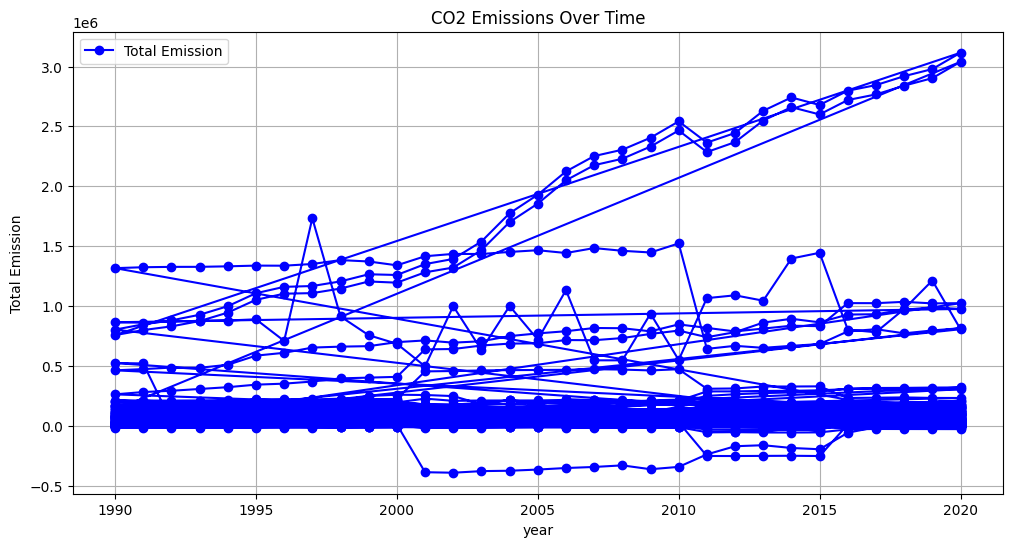

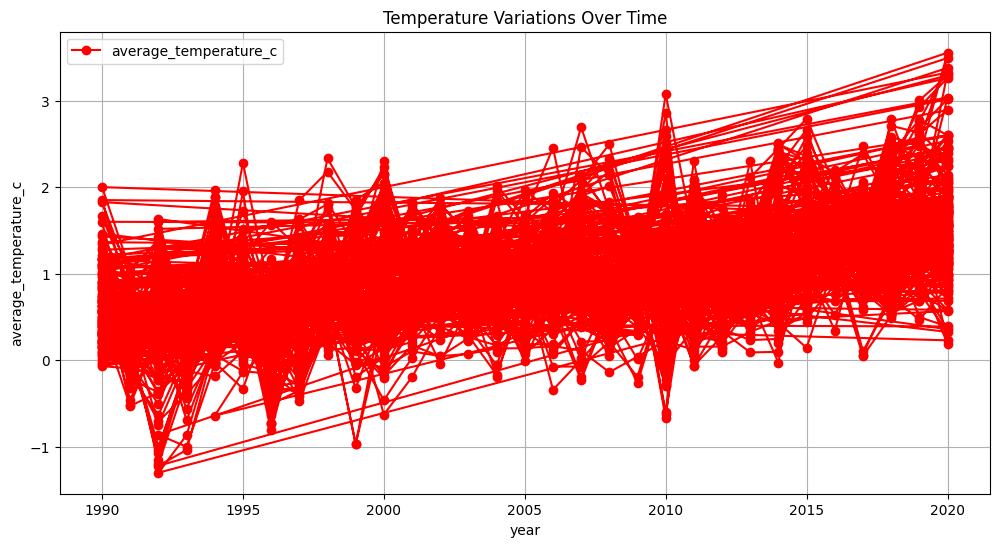

In [ ]:
# Plotting CO2 Emissions Over Time
plt.figure(figsize=(12, 6))  # Create a figure with specific dimensions
plt.plot(df['year'], df['total_emission'], marker='o', color='b', label='Total Emission')  # Plot Year vs. Total CO2 Emissions
plt.title('CO2 Emissions Over Time')  # Set the plot title
plt.xlabel('year')  # Label the x-axis as "Year"
plt.ylabel('Total Emission')  # Label the y-axis as "Total Emission"
plt.legend()  # Display a legend to identify the data
plt.grid(True)  # Add a grid for easier data visualization
plt.show()  # Show the plot

# Plotting Temperature Variations Over Time
plt.figure(figsize=(12, 6))  # Create another figure with the same dimensions
plt.plot(df['year'], df['average_temperature_c'], marker='o', color='r', label='average_temperature_c')  # Plot Year vs. Average Temperature
plt.title('Temperature Variations Over Time')  # Set the plot title
plt.xlabel('year')  # Label the x-axis as "Year"
plt.ylabel('average_temperature_c')  # Label the y-axis as "Average Temperature °C"
plt.legend()  # Display a legend to identify the data
plt.grid(True)  # Add a grid for easier data visualization
plt.show()  # Show the plot


CO2 Emissions Over Time

The chart depicts CO2 emissions trends for various countries or regions from 1990 to 2020, with each line representing a distinct country. The data indicates diverse patterns of emissions, where some countries show a consistent rise, while others demonstrate stability or fluctuations. A global upward trend in emissions is evident, although the rate of increase varies significantly among different regions. These variations suggest that factors such as economic development, industrialization, and environmental policies influence the emissions levels of individual countries differently over time.

Temperature Variations Over Time

The visual data presented illustrates temperature variations over time from 1990 to 2020, represented by numerous red lines tracking average temperature fluctuations. The plot highlights significant variability in the earlier part of the timeline, particularly during the 1990s, where temperature shifts display higher volatility. In contrast, post-2000 data reveals a more consistent upward trend in global temperatures, with a notable acceleration in warming after 2010. This pattern aligns with broader concerns about global climate change, with increasing average temperatures potentially attributed to rising CO2 emissions. The analysis suggests a direct correlation between escalating greenhouse gas emissions and the observed rise in global temperatures, reinforcing the critical importance of addressing environmental and emission-related issues.

----

In [ ]:
# Get dummies with pandas for the object in our dataset
df_model = pd.get_dummies(df)

# Assign X and y variables
y = df_model['average_temperature_c']
X = df_model.drop(columns=y.name, axis=1)

# Train test split with standrd scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling X variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Multiple Linear Regression (MLR)**
## **Encoding, train test split and scaling**
<div>
    <a href="#six-one" font-weight: bold;">Back to contents</a>
</div>

In [19]:
# Get dummies with pandas for the object in our dataset
df_model = pd.get_dummies(df)

# Assign X and y variables
y = df_model['average_temperature_c']
X = df_model.drop(columns=y.name, axis=1)

# Train test split with standrd scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling X variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Multiple Linear Regression (MLR)**
<div>
    <a href="#six-one" font-weight: bold;">Back to contents</a>
</div>



## **Random Forest Regression**
<div>
    <a href="#six-two" font-weight: bold;">Back to contents</a>
</div>

In [21]:
# Define the target and features
target = 'Average Temperature °C'
X = df.drop(columns=[target, 'Area'])  # Dropping non-numeric columns
y = df[target]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Now you can make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Assuming rf_predictions contains your model's predictions
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_predictions
})

# Display the evaluation metrics
print("Random Forest Regression")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("R-squared:", rf_r2)

Random Forest Regression
MAE: 0.25923386623980765
MSE: 0.12783205912851517
R-squared: 0.5913426484240852


In [9]:
# Display the DataFrame
print(comparison_df)

        Actual  Predicted
1335  0.487000   0.809611
5679  1.061250   0.892973
5962  0.458750   0.474366
37   -0.145917   0.346461
5939  1.012000   1.061509
...        ...        ...
3018  1.025000   1.109534
4937  1.180750   0.528213
6386  0.726583   0.904730
848   0.984083   0.905684
4714  0.017583   0.137107

[2090 rows x 2 columns]


In [10]:
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
print(comparison_df)

        Actual  Predicted  Difference
1335  0.487000   0.809611   -0.322611
5679  1.061250   0.892973    0.168277
5962  0.458750   0.474366   -0.015616
37   -0.145917   0.346461   -0.492378
5939  1.012000   1.061509   -0.049509
...        ...        ...         ...
3018  1.025000   1.109534   -0.084534
4937  1.180750   0.528213    0.652537
6386  0.726583   0.904730   -0.178146
848   0.984083   0.905684    0.078399
4714  0.017583   0.137107   -0.119523

[2090 rows x 3 columns]


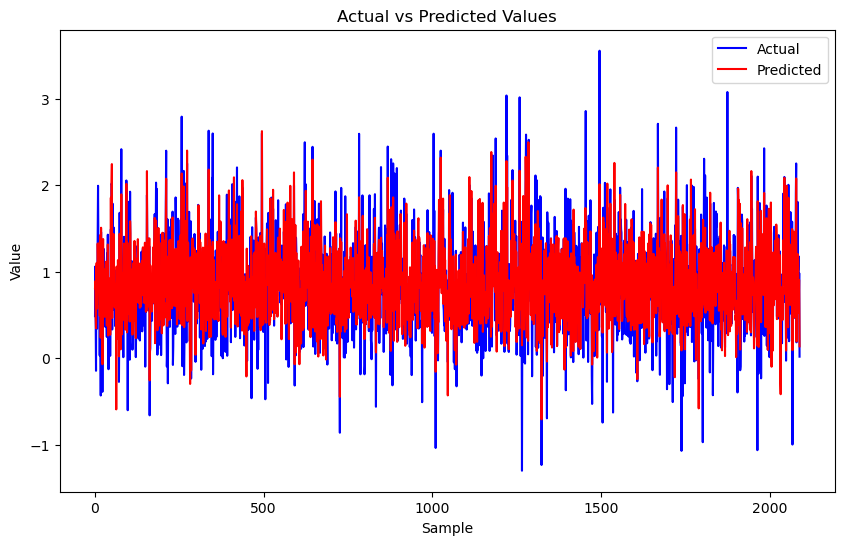

In [11]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual', color='blue')
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

**Mean Absolute Error (MAE):**

- Value: 0.2592 (approximately)
- Interpretation: MAE represents the average absolute difference between the actual values (y_test) and the predicted values (rf_predictions). In this case, on average, the model’s predictions are off by about 0.2592 units. Lower MAE values indicate better performance.

**Mean Squared Error (MSE):** 

- MSE = 0.1278 indicates that, on average, the squared difference between the predicted Average Temperature °C and the actual values is 0.1278.

-To interpret this in more practical terms:

- Scale of Error: Since MSE is in squared units of the target variable (here, degrees Celsius squared), it doesn't directly indicate the average error in °C. However, you can take the square root to get the Root Mean Squared Error (RMSE), which would be easier to interpret on the same scale as temperature:

- RMSE = sqrt(0.1278) ≈ 0.3575

- This value means that the model's predictions have an average deviation of about 0.3575°C from the actual temperature values.

- Comparing MSE across Models: Lower MSE values indicate better predictive accuracy. If you’re comparing this MSE to another model’s MSE, the model with the smaller MSE is generally performing better.


**R-squared (R²):**

- Value: 0.5913 (approximately)
- Interpretation: R-squared measures how well the model explains the variance in the target variable (y_test). Here, an R² of 0.5913 means that around 59.13% of the variability in the target variable is explained by the model. Higher R-squared values (closer to 1) indicate a better fit, while lower values indicate that the model might not be capturing all the underlying patterns in the data.

**In summary:**

- MAE of 0.2592 is relatively low (though this depends on the scale of your data), which is a positive sign for the model’s accuracy.
- R-squared of 0.5913 indicates that there is room for improvement, as it suggests the model captures only about 59% of the variance in the data.

## **Gradient Boosting Regression (XGBoost)**
<div>
    <a href="#six-three" font-weight: bold;">Back to contents</a>
</div>


In [22]:
# Define the target and features
target = 'Average Temperature °C'
X = df.drop(columns=[target, 'Area'])  # Dropping non-numeric columns
y = df[target]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting model
gbr_model.fit(X_train, y_train)
gbr_predictions = gbr_model.predict(X_test)

# Evaluate the models
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_r2 = r2_score(y_test, gbr_predictions)

# Assuming rf_predictions contains your model's predictions
comparison_df_ = pd.DataFrame({
    'Actual': y_test,
    'Predicted': gbr_predictions
})

print("Gradient Boosting Regression")
print("MAE:", gbr_mae)
print("MSE:", gbr_mse)
print("R-squared:", gbr_r2)

Gradient Boosting Regression
MAE: 0.28261402040570993
MSE: 0.1494850269042289
R-squared: 0.5221217931448483


In [18]:
# Display the DataFrame
print(comparison_df_)

        Actual  Predicted
1335  0.487000   0.603746
5679  1.061250   0.819235
5962  0.458750   0.475915
37   -0.145917   0.572771
5939  1.012000   1.100526
...        ...        ...
3018  1.025000   1.074454
4937  1.180750   0.715230
6386  0.726583   0.899944
848   0.984083   0.861792
4714  0.017583   0.621998

[2090 rows x 2 columns]


In [19]:
comparison_df_['Difference'] = comparison_df_['Actual'] - comparison_df_['Predicted']
print(comparison_df_)

        Actual  Predicted  Difference
1335  0.487000   0.603746   -0.116746
5679  1.061250   0.819235    0.242015
5962  0.458750   0.475915   -0.017165
37   -0.145917   0.572771   -0.718688
5939  1.012000   1.100526   -0.088526
...        ...        ...         ...
3018  1.025000   1.074454   -0.049454
4937  1.180750   0.715230    0.465520
6386  0.726583   0.899944   -0.173361
848   0.984083   0.861792    0.122291
4714  0.017583   0.621998   -0.604415

[2090 rows x 3 columns]


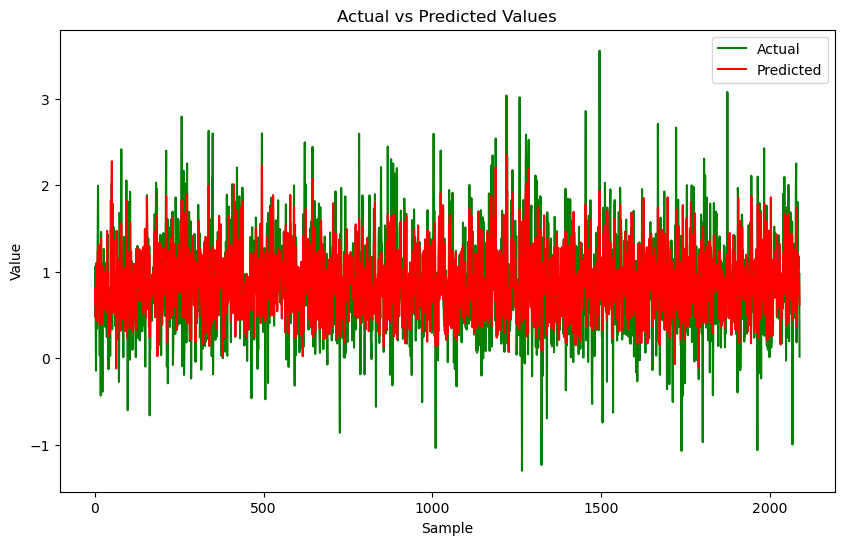

In [20]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df_['Actual'].values, label='Actual', color='green')
plt.plot(comparison_df_['Predicted'].values, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

**Mean Absolute Error (MAE):**

- Value: 0.2826 (approximately)
- Interpretation: This MAE indicates the average absolute error between the actual values and the model's predictions. Here, the model's predictions are, on average, off by about 0.2826  units. Since MAE measures error in the same units as the target variable, lower values indicate a more accurate model.


**Mean Squared Error (MSE):**

- For the Gradient Boosting Regression model is 0.1495.
- This value represents the average squared difference between the predicted and actual Average Temperature °C. Here’s how to interpret it:

- Scale of Error: Since MSE is in squared units of the target variable, it doesn’t directly convey the average error in degrees Celsius. Taking the square root of the MSE to obtain the Root Mean Squared Error (RMSE) gives an error in the same units as the temperature:

- RMSE= sqrt(0.1495)≈ 0.387

- This suggests that the model's predictions have an average deviation of approximately 0.387°C from the actual temperature values.

- Comparison to Other Models: If you’re comparing this to the Random Forest model, which had an MSE of 0.1278 (RMSE of approximately 0.358°C), the Random Forest model has a slightly better predictive performance, with a smaller average deviation from the actual temperature values.



**R-squared (R²):**

- Value: 0.5221 (approximately)
- Interpretation: An R-squared of 0.5221 means that the model explains around 52.21% of the variance in the target variable. This suggests that about half of the variability in the target is captured by the model. An R-squared closer to 1 would indicate a better fit, so this value suggests that there may still be underlying patterns in the data that the model isn’t fully capturing.

**Summary and Comparison:**

- The MAE for this Gradient Boosting model is slightly higher (0.2826) than that of your Random Forest model (0.2592), meaning it has a slightly higher average error.
- The R-squared of 0.5221 is also lower than that of the Random Forest model (0.5913), indicating that this model explains less of the variance in the target variable.

Overall, based on these metrics, the Random Forest Regression model is performing better than the Gradient Boosting model, as it has a lower MAE and a higher R-squared.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [20]:
#Please use code cells to code in 

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [21]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Collaborators: 
  - Kyle Ebrahim
  - Selogilwe Tlhale
  - Josia Sithole
  - Mgcini Emmanuel Majola
  - Jerry Maleka
  - Nhlokomo Mhlophe
